The following Notebook carries out prelinary EDA (exploratory data analysis) on a data set that contains information on the prevalence of West Nile Virus in the City of Chicago. The data set contains recordings between 2007 and 2019.

### DATA AND LIBRARY IMPORT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/mosquito_data.csv')

### SUMMARY STATS

In [3]:
df.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


In [4]:
df.describe()

,Year,Week,Block,Mosquito number,Lat,Lon
count,18495.000000,18495.000000,18495.000000,18495.000000,15571.000000,15571.000000
mean,2012.905812,31.004001,54.314788,10.879913,41.839963,-87.691642
std,3.725857,4.332020,36.712796,13.475066,0.111374,0.076545
min,2007.000000,20.000000,1.000000,1.000000,41.644720,-87.854473
25%,2010.000000,28.000000,22.000000,2.000000,41.742670,-87.747459
50%,2013.000000,31.000000,51.000000,5.000000,41.845715,-87.691698
75%,2016.000000,34.000000,89.000000,14.000000,41.945961,-87.637873
max,2019.000000,40.000000,132.000000,50.000000,42.017801,-87.531051


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


#### Column Information

**Year**-- Year that the WNV test is performed --	int64	

**Week**-- Week that the WNV test is performed	-- int64	

**Address Block** -- Address of the location of trap. -- string	

**Block** -- Block number of address -- int64

**Trap** -- Id of the trap -- string **NOTE** Some traps are "satellite traps". These are traps that are set up near (usually within 6 blocks) an established trap to enhance surveillance efforts. Satellite traps are post fixed with letters. For example, T220A is a satellite trap to T220.

**Trap type** -- Type of trap -- string	

**Date** -- Date and time that the WNV test is performed -- string	**NOTE** Not all the locations are tested at all times. Also, records exist only when a particular species of mosquitoes is found at a certain trap at a certain time.


**Mosquito number** -- Number of mosquitoes caught in this trap -- int64 **NOTE** These test results are organized in such a way that when the number of mosquitoes exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitoes are capped at 50.

**Mosquito ID**	-- Id for Mosquito species -- string

**WNV Present** -- Whether West Nile Virus was present in these mosquitos -- string		

**Species** -- Mosquito species -- string

**Lat** -- Latitude of trap -- float64		

**Lon** -- Longitude of trap -- float64

### Data Wrangling

In [6]:
# Finding the shape of the dataframe:

df.shape

(18495, 13)

The dataframe is 18495 rows by 13 columns. 

In [7]:
# converting 'Date' datatype to Datetime:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
# Sense checking...
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             18495 non-null  int64         
 1   Week             18495 non-null  int64         
 2   Address Block    18495 non-null  object        
 3   Block            18495 non-null  int64         
 4   Trap             18495 non-null  object        
 5   Trap type        18495 non-null  object        
 6   Date             18495 non-null  datetime64[ns]
 7   Mosquito number  18495 non-null  int64         
 8   Mosquito ID      18495 non-null  object        
 9   WNV Present      18495 non-null  object        
 10  Species          18495 non-null  object        
 11  Lat              15571 non-null  float64       
 12  Lon              15571 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 1.8+ MB


In [9]:
# Select all numeric columns...
df.select_dtypes('number')

,Year,Week,Block,Mosquito number,Lat,Lon
0,2019,39,100,2,NaN,NaN
1,2019,39,52,1,41.798211,-87.736925
2,2019,39,58,2,41.987245,-87.689417
3,2019,39,39,1,41.953664,-87.724987
4,2019,39,131,9,41.657069,-87.546049
...,...,...,...,...,...,...
18490,2016,36,3,4,41.857843,-87.635858
18491,2007,34,46,19,41.965376,-87.758403
18492,2016,30,127,34,41.662395,-87.590176
18493,2017,33,20,50,41.919197,-87.664758


In [10]:
# Select all non numeric columns
df.select_dtypes('object')

,Address Block,Trap,Trap type,Mosquito ID,WNV Present,Species
0,100XX W OHARE AIRPORT,T910,GRAVID,Res,negative,CULEX RESTUANS
1,52XX S KOLMAR AVE,T114,GRAVID,Res,negative,CULEX RESTUANS
2,58XX N WESTERN AVE,T028,GRAVID,Res,negative,CULEX RESTUANS
3,39XX N SPRINGFIELD AVE,T228,GRAVID,Res,negative,CULEX RESTUANS
4,131XX S BRANDON AVE,T209,GRAVID,Res,negative,CULEX RESTUANS
...,...,...,...,...,...,...
18490,3XX W 18TH ST,T043,GRAVID,Pip,positive,CULEX PIPIENS
18491,46XX N MILWAUKEE AVE,T003,GRAVID,Pip,positive,CULEX PIPIENS
18492,127XX S DOTY AVE,T115,GRAVID,Res,positive,CULEX RESTUANS
18493,20XX N DOMINICK ST,T240B,SENTINEL,Res,positive,CULEX RESTUANS


Two columns that are storing numeric data are 'Week' and 'Mosquito Number'. The former refers to the week in which the recording was taken, and the latter refers to the total number of mosquitos found in a single trap. Note that the maximum number in a single row is 50, and if the total count exceeded this then a second row was added for that recording. 

Two columns which store categorical data are 'Trap type' and 'Species'. The former refers to the type of trap used to capture the mosquitos, and the latter refers to the species of mosquito captured.

#### Looking at  distributions of 'Mosquito Number' and 'Week'...

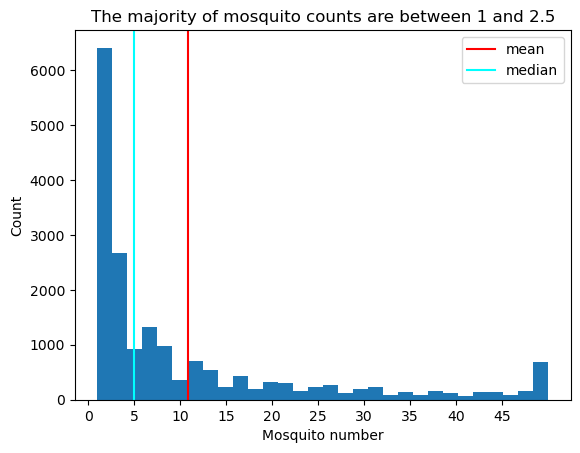

In [11]:
#Histogram for mosquito number
plt.figure()

plt.hist(df['Mosquito number'],bins = 30)
plt.axvline(df['Mosquito number'].mean(), label = 'mean',color='r')
plt.axvline(df['Mosquito number'].median(), label = 'median',color='cyan')
plt.xticks(np.arange(0,50,step =5))

plt.xlabel('Mosquito number')
plt.ylabel('Count')
plt.title('The majority of mosquito counts are between 1 and 2.5')

plt.legend()
plt.show()

The above distribution shows the majority of mosquito counts to be between 1 and 2.5. The distribution is skewed towards the left with a long right tail.

Note that the maximum count is 50. Hence, this needs to be looked at with caution, as once the count goes above 50, a new row in the data set is added for the remainder. However, the maximum number of counts where this occurs will not exceed the total number of counts = 50 (roughly 800 readings in the above histogram). Hence, even taking this into account, the most common mosquito count will still be between 1 and 2.5. 

Looking at week number distribution...

In [12]:
week_number = df['Date'].dt.isocalendar().week # Getting the week number from the Date column
df['Week_num_from_datetime'] = week_number
df[['Week','Week_num_from_datetime']]
np.where(df['Week'] == df['Week_num_from_datetime'], 0,1).sum()

6081

The above shows that 6081 rows of the 'Week' column do not match the week number of the 'Date' column. This is assumed to be an error when inputing values in the 'Week' number. It is more likely that the 'Date' column is automated/not input manually, and so going forward, the Date column should be used instead.

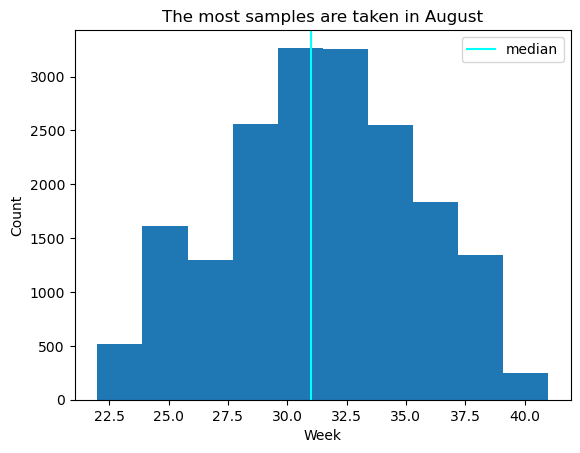

In [13]:
# Histogram for Week number
plt.figure()

plt.hist(df['Week_num_from_datetime'],bins = 10)
plt.axvline(df['Week_num_from_datetime'].median(), label = 'median',color='cyan')

plt.xlabel('Week')
plt.ylabel('Count')
plt.title('The most samples are taken in August')

plt.legend()
plt.show()

The above histogram shows that the distribution for the months where samples are taken is roughly normally distributed, between week 20 and week 40 (May and October). The month where the highest number of samples is taken is Weeks 30 - 32 (July/August). This will need to be considered when comparing monthly totals, as it may be that a different number of samples was taken between months, providing misleading representation of the total number of mosquitos counted.   

A second explanation for this could be that the number of mosquitos recorded in each sample is higher in the summer months. Hence, more counts will be > 50, and so will take more rows in the data set and as such make it seem like more recordings are taken in the summer. The below histogram plots only the week number where mosquito number < 50.

In [14]:
mos_filter = df['Mosquito number']<50
week_number = df[(mos_filter)]['Date'].dt.isocalendar().week # Getting the week number from the Date column
df['Week_num_from_datetime'] = week_number

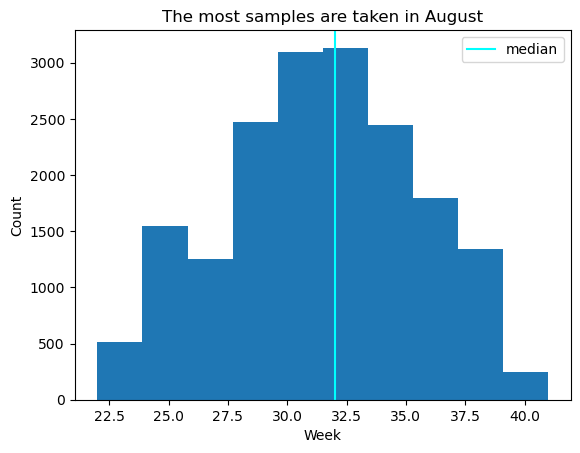

In [15]:
mos_filter = df['Mosquito number']<50 # filtering for only recording where mosquito count < 50.
week_number = df[(mos_filter)]['Date'].dt.isocalendar().week # Getting the week number from the Date column
plt.figure()

plt.hist(week_number,bins = 10)
plt.axvline(week_number.median(), label = 'median',color='cyan')

plt.xlabel('Week')
plt.ylabel('Count')
plt.title('The most samples are taken in August')

plt.legend()
plt.show()

There is not a significant difference between the first and second histogram, and so the impact of the '50 mosquito carry over' effect is ignored. 

The week number distribution is plotted for a SINGLE year (2010), to see how much off an impact aggregating all of the years on the distribution had.  

In [16]:
_2010_week_series = df[(df['Year']==2010)]['Week_num_from_datetime']
_2010_week_series = _2010_week_series.dropna()

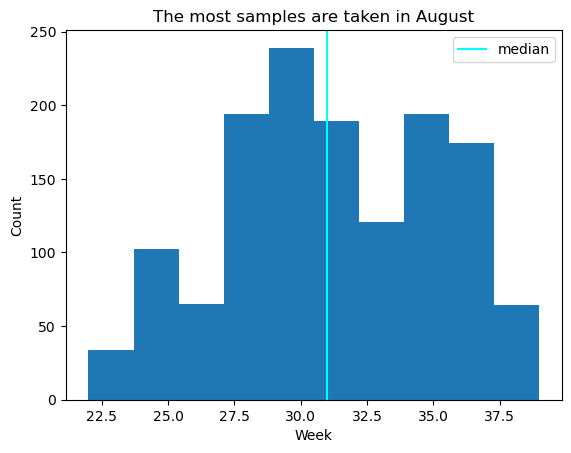

In [17]:
# Histogram for Week number in 2010
plt.figure()

plt.hist(_2010_week_series,bins = 10)
plt.axvline(_2010_week_series.median(), label = 'median',color='cyan')

plt.xlabel('Week')
plt.ylabel('Count')
plt.title('The most samples are taken in August')

plt.legend()
plt.show()

Based on the findings from the first histogram for week number, the above histogram was created. This shows the distribution of week numbers for 2010 only. It shows that the spread of weeks is much more varied, meaning that the sample count for weeks varies, and as such is unlikely to influence the monthly comparisons of mosquito counts.

#### Looking at  distributions of 'Trap Type' and 'Species'...


Text(0, 0.5, 'Total number of times used')

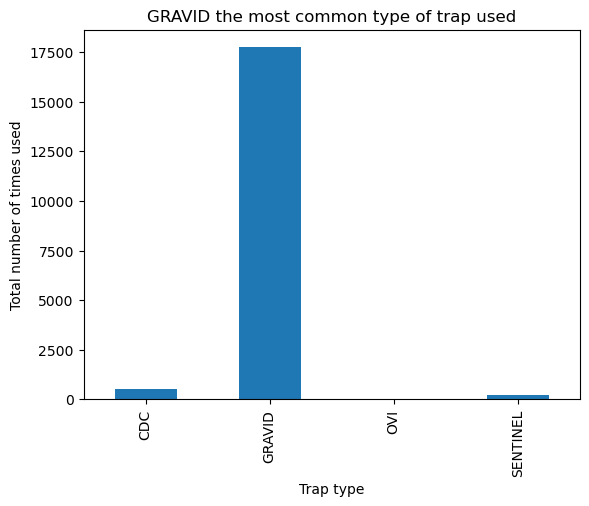

In [18]:
# Bar chart of different Trap Types
df.groupby('Trap type')['Trap type']\
        .count()\
        .plot(kind = 'bar')

plt.title('GRAVID the most common type of trap used')
plt.ylabel('Total number of times used')

The above shows GRAVID to be the most common type of trap used. However, care should be taken as it could be that this trap has a larger capacity than others, and so is more likely to have a mosquito count > 50. If this was the case, then a second row would be added to account for a count > 50, but it would still only be the single trap. Hence, the below bar chart considers only counts < 50.

Text(0, 0.5, 'Total number of times used')

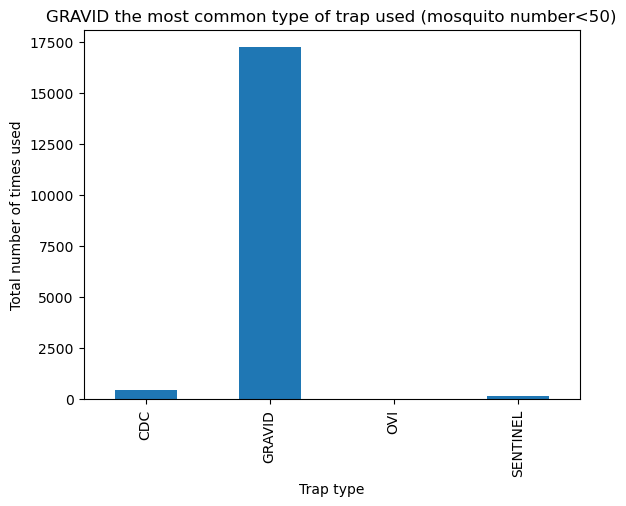

In [19]:
df_less_than_50 = df[(df['Mosquito number']<50)] # Filtering for recordings where the mosquito count < 50. 

df_less_than_50.groupby('Trap type')['Trap type']\
        .count()\
        .plot(kind = 'bar')

plt.title('GRAVID the most common type of trap used (mosquito number<50)')
plt.ylabel('Total number of times used')

The above shows an identical picture to the previous bar chart, hence the effect of mosquito number > 50 can be ignored.

Plotting the distribution of different species...

Text(0, 0.5, 'Total number of mosquitos found between 2007 and 2019')

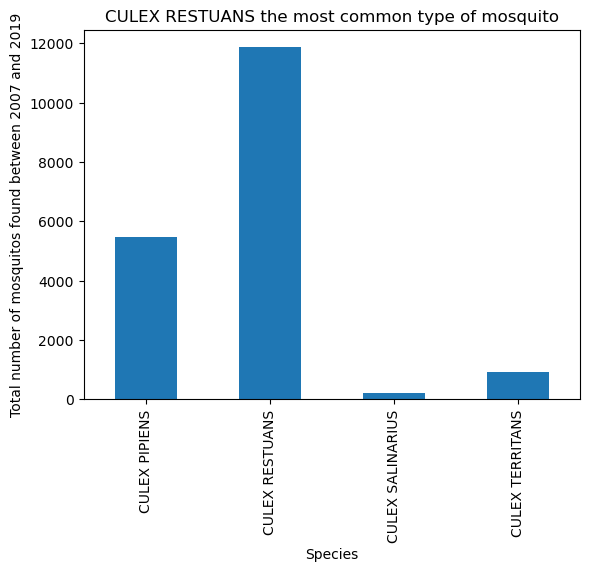

In [20]:
# Bar chart of different species
df.groupby('Species')['Species']\
        .count()\
        .plot(kind = 'bar')

plt.title('CULEX RESTUANS the most common type of mosquito')
plt.ylabel('Total number of mosquitos found between 2007 and 2019')

#### Identifying redundant information

In [21]:
# Count the number of duplicate rows
df.duplicated().sum()

658

In [22]:
#Count the number of duplicate columns
df.T.duplicated().sum()

0

There are 658 duplicate rows, and 0 duplicate columns.

In [23]:
# Create a data frame with just the duplicate rows. 
df_dups = df[(df.duplicated(keep=False))].sort_values('Year') # set keep = False ensures instances of the duplicate rows are kept
df_dups.shape

(862, 14)

There are 862 rows in TOTAL which are duplicates.

In [24]:
#Find the number of rows within the duplicate row data frame where latitude data is missing. 
df_dups[(df['Lat'].isna() )].shape

/var/folders/6g/n6mk7qn52n9dhnw8hy9rx6500000gn/T/ipykernel_86876/4146984684.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dups[(df['Lat'].isna() )].shape


(862, 14)

Interestingly, every row which is a duplicate also has missing latitude and longitude data. This raises the question whether there is a link between the two. 

In [25]:
df_dups.describe()

,Year,Week,Block,Mosquito number,Lat,Lon,Week_num_from_datetime
count,862.000000,862.000000,862.000000,862.000000,0.0,0.0,762.000000
mean,2014.397912,31.699536,93.510441,22.218097,NaN,NaN,32.166667
std,3.152072,2.744476,23.069541,16.093188,NaN,NaN,2.634511
min,2007.000000,23.000000,4.000000,1.000000,NaN,NaN,23.000000
25%,2012.000000,30.000000,100.000000,8.000000,NaN,NaN,30.000000
50%,2016.000000,32.000000,100.000000,18.500000,NaN,NaN,32.000000
75%,2017.000000,33.750000,100.000000,35.000000,NaN,NaN,34.000000
max,2019.000000,39.000000,115.000000,50.000000,NaN,NaN,40.000000


The main item from the above summary which stands out is that the 25%, 50% and 75% for Block are all 100. This needs further investigation...

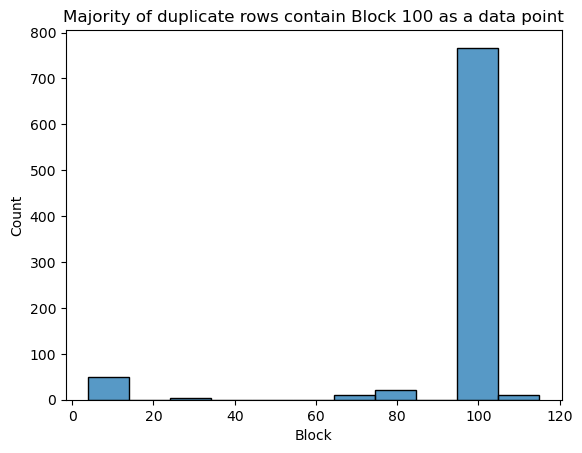

In [26]:
sns.histplot(df_dups['Block'])
plt.title('Majority of duplicate rows contain Block 100 as a data point');

In [27]:
df_dups[(df['Block']==100)].count()/862 * 100 # there are 862 total duplicate rows. By dividing by 862
                                              # you get the % of duplicate rows where the Block = 100.

/var/folders/6g/n6mk7qn52n9dhnw8hy9rx6500000gn/T/ipykernel_86876/2996340342.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dups[(df['Block']==100)].count()/862 * 100 # there are 862 total duplicate rows. By dividing by 862


Year                      88.979118
Week                      88.979118
Address Block             88.979118
Block                     88.979118
Trap                      88.979118
Trap type                 88.979118
Date                      88.979118
Mosquito number           88.979118
Mosquito ID               88.979118
WNV Present               88.979118
Species                   88.979118
Lat                        0.000000
Lon                        0.000000
Week_num_from_datetime    79.002320
dtype: float64

The above shows that 93% of the duplicate rows contain Block 100. 

In [28]:
df_dups[(df['Block']==100)]['Address Block']

/var/folders/6g/n6mk7qn52n9dhnw8hy9rx6500000gn/T/ipykernel_86876/3238882359.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dups[(df['Block']==100)]['Address Block']


15665    100XX W OHARE AIRPORT
16061            100XX W OHARE
15627            100XX W OHARE
17369    100XX W OHARE AIRPORT
11830    100XX W OHARE AIRPORT
                 ...          
17206    100XX W OHARE AIRPORT
16523    100XX W OHARE AIRPORT
16532    100XX W OHARE AIRPORT
17397    100XX W OHARE AIRPORT
187      100XX W OHARE AIRPORT
Name: Address Block, Length: 767, dtype: object

The above shows that the 767/826 = 93% of duplicate values come from Ohare Airport entries. 


These entries account for only 767/18495 = 0.04% of all rows. Hence, removing them seems like a sensible option to ensure that the duplicates do not skew the data (as it is unknown if the data is legitimate or not).

In [29]:
# Removing all rows containing OHARE in the Address Block column.
df.drop(df[df['Address Block'].str.contains('OHARE')].index, inplace = True)
df.duplicated().sum()

70

There are now only 70 duplicate rows in the data.


The columns 'Year' and 'Week' are both pieces of data that are represented by the Datetime data in 'Date' column. Hence, they are duplicating information and can be removed. The information in 'Block' is also contained in the full 'Address Block' column, and can also be removed. 

In [30]:
df.shape

(16230, 14)

In [31]:
df_clean = df.drop(columns = ['Year','Week','Block']) 


In [32]:
df_clean.shape

(16230, 11)

Looking at the remaining duplicate rows from df_clean...

In [33]:
df_clean_dups = df_clean[(df_clean.duplicated(keep=False))].sort_values('Date')
df_clean_dups

,Address Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon,Week_num_from_datetime
17733,4XX W 127TH,T135,CDC,2007-08-01 02:08:34,10,Pip,positive,CULEX PIPIENS,NaN,NaN,31
14942,4XX W 127TH,T135,CDC,2007-08-01 02:08:34,10,Pip,positive,CULEX PIPIENS,NaN,NaN,31
17613,4XX W 127TH,T135,CDC,2007-08-01 02:08:34,10,Pip,positive,CULEX PIPIENS,NaN,NaN,31
17486,4XX W 127TH,T135,CDC,2007-08-01 02:08:34,10,Pip,positive,CULEX PIPIENS,NaN,NaN,31
14703,65XX N OAK PARK AVE,T143,GRAVID,2007-08-07 00:08:00,29,Pip,positive,CULEX PIPIENS,NaN,NaN,32
...,...,...,...,...,...,...,...,...,...,...,...
16803,4XX W 127TH,T135,GRAVID,2018-07-19 00:07:00,15,Res,positive,CULEX RESTUANS,NaN,NaN,29
16254,4XX W 127TH,T135,GRAVID,2018-07-19 00:07:00,15,Res,positive,CULEX RESTUANS,NaN,NaN,29
18037,4XX W 127TH,T135,GRAVID,2018-07-19 00:07:00,15,Res,positive,CULEX RESTUANS,NaN,NaN,29
15652,4XX W 127TH,T135,GRAVID,2018-07-19 00:07:00,15,Res,positive,CULEX RESTUANS,NaN,NaN,29


In [34]:
df_clean_dups[(df_clean_dups['Address Block']=='4XX W 127TH')].count()/99 * 100

Address Block             49.494949
Trap                      49.494949
Trap type                 49.494949
Date                      49.494949
Mosquito number           49.494949
Mosquito ID               49.494949
WNV Present               49.494949
Species                   49.494949
Lat                        0.000000
Lon                        0.000000
Week_num_from_datetime    41.414141
dtype: float64

50% of the remaining duplicates come from one location (4XX W 127TH). Hence, it has been decided to drop all remaining duplicate 
rows.

In [35]:
df_clean.drop_duplicates(inplace=True)
df_clean.duplicated().sum() # No duplicate rows in the cleaned data frame.  

0

In [36]:
df_clean.reset_index(drop=True, inplace=True) # resetting the row index after dropping rows.
df_clean.drop(columns ='Week_num_from_datetime', inplace=True)

In [37]:
df_clean.shape

(16158, 10)

### Identifying null values


In [38]:
df_clean.isna()

,Address Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
16153,False,False,False,False,False,False,False,False,False,False
16154,False,False,False,False,False,False,False,False,False,False
16155,False,False,False,False,False,False,False,False,False,False
16156,False,False,False,False,False,False,False,False,False,False


In [39]:
df_clean.isna().sum() /df.shape[0]*100

Address Block      0.000000
Trap               0.000000
Trap type          0.000000
Date               0.000000
Mosquito number    0.000000
Mosquito ID        0.000000
WNV Present        0.000000
Species            0.000000
Lat                3.629082
Lon                3.629082
dtype: float64

The above shows there to be 3.6% of the data missing for the latitude and longitude columns.

In [40]:
# Getting a Series of only the Address Blocks were lat/lon is missing.
df_null_locs = df_clean[df_clean['Lon'].isnull()]['Address Block'] 
df_null_locs

92               4XX W 127TH
123              4XX W 127TH
135              4XX W 127TH
158           81XX S ASHLAND
199              4XX W 127TH
                ...         
13751            4XX W 127TH
13760            4XX W 127TH
13762         43XX N ASHLAND
13773    65XX N OAK PARK AVE
13778            4XX W 127TH
Name: Address Block, Length: 589, dtype: object

In [41]:
df_distinct_null_locs = df_null_locs.drop_duplicates() # obtain the unique addresses where missing lat/lon
df_distinct_null_locs

92               4XX W 127TH
158           81XX S ASHLAND
316           79XX S CHICAGO
12070        98XX S AVENUE G
12097    65XX N OAK PARK AVE
12101       115XX S AVENUE L
12127           30XX S HOYNE
12275         43XX N ASHLAND
Name: Address Block, dtype: object

The above provides a Series of all the distinct location names where latitude and longitude data is missing. 

In [42]:
df_distinct_null_locs.to_csv('distinct null locs.csv') # Export list of locations to csv

The exported csv is opened in Google Sheets. 'Geocode by Awesome Table' is a plugin that automatically provides the latitude and longitude based on an address. Once completed, the table was saved as csv and imported below.

In [43]:
df_clean.shape

(16158, 10)

In [44]:
df_lat_lon = pd.read_csv('completed_lat_lon.csv') 
df_lat_lon

,Unnamed: 0,Address Block,Lat,Lon
0,97,4XX W 127TH,41.662014,-87.723872
1,173,81XX S ASHLAND,41.800873,-87.664691
2,351,79XX S CHICAGO,41.878114,-87.629798
3,13749,98XX S AVENUE G,41.718975,-87.527983
4,13776,65XX N OAK PARK AVE,41.953467,-87.796337
5,13780,115XX S AVENUE L,41.708631,-87.535170
6,13806,30XX S HOYNE,41.786296,-87.676547
7,13954,43XX N ASHLAND,41.952022,-87.669044


In [45]:
# Remove unnecessary columns from df_lat_lon...
df_lat_lon.drop(columns = 'Unnamed: 0', inplace=True) 
df_lat_lon = df_lat_lon.iloc[0:10,0:3]

In [46]:
df_lat_lon

,Address Block,Lat,Lon
0,4XX W 127TH,41.662014,-87.723872
1,81XX S ASHLAND,41.800873,-87.664691
2,79XX S CHICAGO,41.878114,-87.629798
3,98XX S AVENUE G,41.718975,-87.527983
4,65XX N OAK PARK AVE,41.953467,-87.796337
5,115XX S AVENUE L,41.708631,-87.535170
6,30XX S HOYNE,41.786296,-87.676547
7,43XX N ASHLAND,41.952022,-87.669044


In [47]:
df_clean.shape

(16158, 10)

In [48]:
# The df_lat_lon dataframe needs to be combined with the main df_clean dataframe, to fill in NaN values.
df_clean.set_index('Address Block', inplace=True) # setting both of the data frames to have the same index column temporarily.
df_lat_lon.set_index('Address Block', inplace=True)

df_clean = df_clean.combine_first(df_lat_lon)
df_clean.reset_index(inplace=True)

In [49]:
df_clean

,Address Block,Date,Lat,Lon,Mosquito ID,Mosquito number,Species,Trap,Trap type,WNV Present
0,101XX S STONY ISLAND AVE,2019-09-26 00:09:00,41.710542,-87.584559,Res,6,CULEX RESTUANS,T138,GRAVID,negative
1,101XX S STONY ISLAND AVE,2019-09-19 00:09:00,41.710542,-87.584559,Res,1,CULEX RESTUANS,T138,GRAVID,negative
2,101XX S STONY ISLAND AVE,2019-09-12 00:09:00,41.710542,-87.584559,Res,5,CULEX RESTUANS,T138,GRAVID,negative
3,101XX S STONY ISLAND AVE,2019-09-05 00:09:00,41.710542,-87.584559,Ter,1,CULEX TERRITANS,T138,GRAVID,negative
4,101XX S STONY ISLAND AVE,2019-09-05 00:09:00,41.710542,-87.584559,Res,9,CULEX RESTUANS,T138,GRAVID,negative
...,...,...,...,...,...,...,...,...,...,...
16153,9XX W GARFIELD BLVD,2013-07-19 00:07:00,41.794368,-87.648925,Res,33,CULEX RESTUANS,T226,GRAVID,positive
16154,9XX W GARFIELD BLVD,2013-07-19 00:07:00,41.794369,-87.648924,Res,33,CULEX RESTUANS,T226,GRAVID,positive
16155,9XX W GARFIELD BLVD,2013-08-08 00:08:00,41.794371,-87.648922,Pip,5,CULEX PIPIENS,T226,GRAVID,positive
16156,9XX W GARFIELD BLVD,2015-08-12 00:08:00,41.794374,-87.648917,Res,22,CULEX RESTUANS,T226,GRAVID,positive


In [50]:
df_clean.isna().sum()

Address Block      0
Date               0
Lat                0
Lon                0
Mosquito ID        0
Mosquito number    0
Species            0
Trap               0
Trap type          0
WNV Present        0
dtype: int64

The data frame has now been cleaned, with no missing values.

In [51]:
df_clean.head(5)

,Address Block,Date,Lat,Lon,Mosquito ID,Mosquito number,Species,Trap,Trap type,WNV Present
0,101XX S STONY ISLAND AVE,2019-09-26 00:09:00,41.710542,-87.584559,Res,6,CULEX RESTUANS,T138,GRAVID,negative
1,101XX S STONY ISLAND AVE,2019-09-19 00:09:00,41.710542,-87.584559,Res,1,CULEX RESTUANS,T138,GRAVID,negative
2,101XX S STONY ISLAND AVE,2019-09-12 00:09:00,41.710542,-87.584559,Res,5,CULEX RESTUANS,T138,GRAVID,negative
3,101XX S STONY ISLAND AVE,2019-09-05 00:09:00,41.710542,-87.584559,Ter,1,CULEX TERRITANS,T138,GRAVID,negative
4,101XX S STONY ISLAND AVE,2019-09-05 00:09:00,41.710542,-87.584559,Res,9,CULEX RESTUANS,T138,GRAVID,negative


### EDA

In [52]:
# LOOKING AT JUST THE YEAR OF THE DATE
years = pd.DatetimeIndex(df_clean['Date']).year
df_clean['Date'] = pd.to_datetime(df_clean['Date'])
year_mos_count = df.groupby(df_clean.Date.dt.year)['Mosquito number'].sum() # grouping by the year and summing the number of mosquitos counted in that particular year.


In [53]:
# Convert Series to data frame
df_mos_count = year_mos_count.to_frame()
df_mos_count.reset_index(inplace=True)
df_mos_count

,Date,Mosquito number
0,2007.0,16118
1,2008.0,6786
2,2009.0,7931
3,2010.0,10378
4,2011.0,8064
5,2012.0,8926
6,2013.0,10626
7,2014.0,13668
8,2015.0,7701
9,2016.0,11802


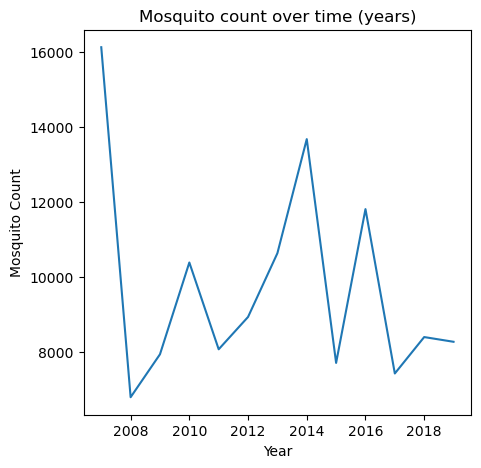

In [54]:
# Plot line graph of mosquito count vs year
plt.figure(figsize = (5,5))

x = df_mos_count['Date']
y = df_mos_count['Mosquito number']

plt.plot(x, y)
plt.title('Mosquito count over time (years)')
plt.xlabel('Year')
plt.ylabel('Mosquito Count');

There doesn't seem to be any trend in the graph above. Let's look at the months to see if there is any trend on a more granular level.

In [55]:
# LOOKING AT JUST THE MONTH OF THE DATE
years = pd.DatetimeIndex(df_clean['Date']).month
df_clean['Date'] = pd.to_datetime(df_clean['Date'])
month_mos_count = df.groupby(df_clean.Date.dt.month)['Mosquito number'].sum()
month_mos_count

Date
5.0       303
6.0     19057
7.0     35300
8.0     45621
9.0     24219
10.0     1573
Name: Mosquito number, dtype: int64

In [56]:
# Convert Series to data frame
df_mos_count_month = month_mos_count.to_frame()
df_mos_count_month.reset_index(inplace=True)
df_mos_count_month

,Date,Mosquito number
0,5.0,303
1,6.0,19057
2,7.0,35300
3,8.0,45621
4,9.0,24219
5,10.0,1573


Text(0, 0.5, 'Total mosquito count between 2007 and 2019 ')

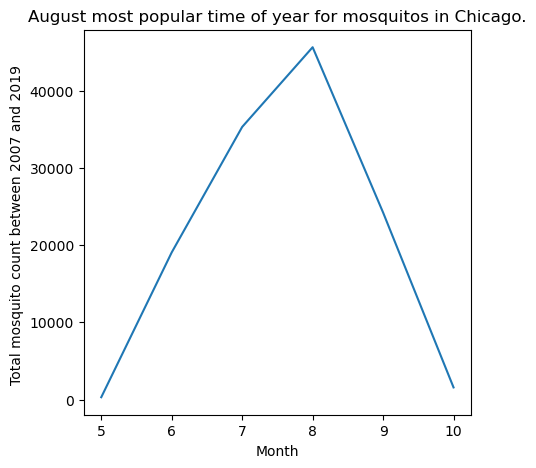

In [57]:
# Plot line graph of mosquito count vs year
plt.figure(figsize = (5,5))

x = df_mos_count_month['Date']
y = df_mos_count_month['Mosquito number']

plt.plot(x, y)
plt.title('August most popular time of year for mosquitos in Chicago.')
plt.xlabel('Month')
plt.ylabel('Total mosquito count between 2007 and 2019 ')

The above graph suggests that mosquito numbers peak in August, and drop over the winter months in Chicago. 

### Relationship between mosquito species and WNV

In [58]:
df_wnv = df_clean.groupby(['Species','WNV Present']).count()

In [59]:
df_wnv.drop(columns=['Trap','Trap type','Date','Mosquito number','Mosquito ID','Lat','Lon'], inplace=True)
df_wnv.rename(columns = {'Address Block':'Count'},inplace=True)
df_wnv

Count
Species          WNV Present       
CULEX PIPIENS    negative      3640
                 positive      1188
CULEX RESTUANS   negative      8333
                 positive      1937
CULEX SALINARIUS negative       175
                 positive         5
CULEX TERRITANS  negative       866
                 positive        14

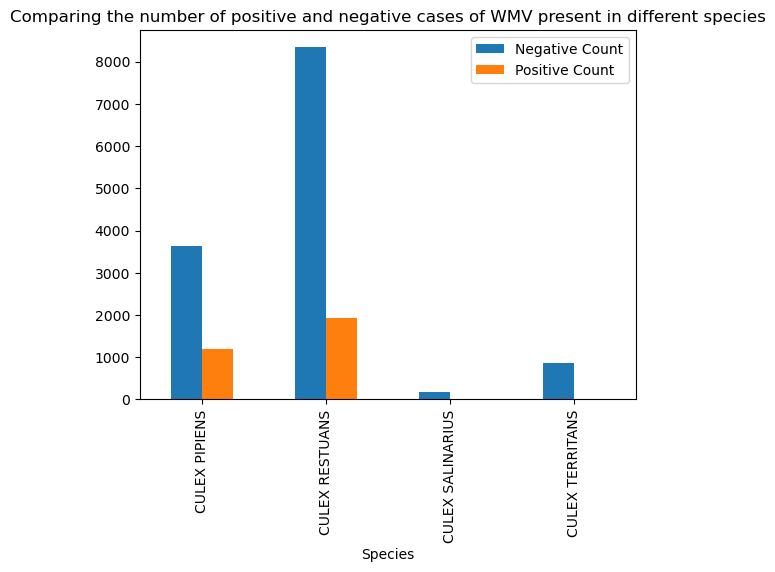

In [60]:
ax = df_wnv.unstack('WNV Present').plot(kind='bar')
ax.legend(["Negative Count", "Positive Count"])
ax.set_title('Comparing the number of positive and negative cases of WMV present in different species');


The above graph is influenced heavily by the number of mosquitos trapped. Hence, it is more useful to look at the number of positive cases as a % of the total number captured for each species.

In [61]:
df_wnv = df_wnv.unstack().fillna(0) # replace the NaN values in the positive column with 0, assuming NaN means no positive were recorded.

In [62]:
df_wnv['Total mosquito count'] = df_wnv.sum(axis = 1)

In [63]:
df_wnv

Count          Total mosquito count
WNV Present      negative positive                     
Species                                                
CULEX PIPIENS        3640     1188                 4828
CULEX RESTUANS       8333     1937                10270
CULEX SALINARIUS      175        5                  180
CULEX TERRITANS       866       14                  880

In [64]:
df_wnv['Positive %'] = df_wnv['Count','positive']/df_wnv['Total mosquito count']*100

In [65]:
df_wnv

Count          Total mosquito count Positive %
WNV Present      negative positive                                
Species                                                           
CULEX PIPIENS        3640     1188                 4828  24.606462
CULEX RESTUANS       8333     1937                10270  18.860759
CULEX SALINARIUS      175        5                  180   2.777778
CULEX TERRITANS       866       14                  880   1.590909

Text(0.5, 1.0, 'CULEX PIPIENS has the highest % of positive cases')

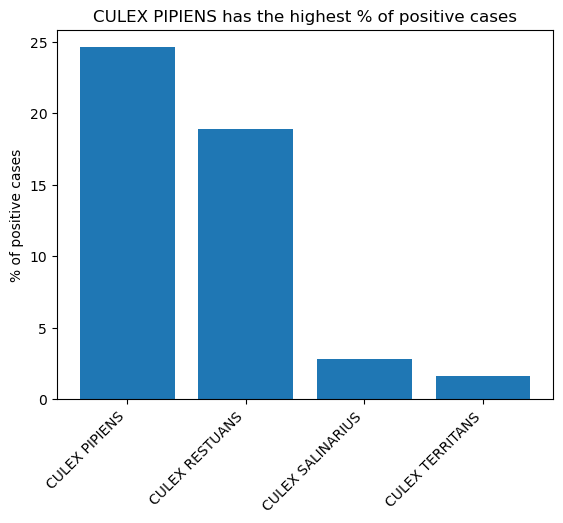

In [66]:
plt.bar(df_wnv.index,df_wnv['Positive %'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('% of positive cases')
plt.title('CULEX PIPIENS has the highest % of positive cases')

Interestingly, the first bar chart suggested a higher number of positive CULEX RESTUANS cases. However, when taken as a % of the count for each species, it can be seen that CULEX PIPIENS is actual more likely to have positive cases.

By visualising the data in this way, we can see that there are in fact a % of CULEX SALINARIUS and CULEX TERRITANS cases which are positive. The number of positive cases is so small in comparison to PIPIENS and RESTUANS that the first bar chart fails to register them, falsely suggesting that no positive cases occur.

### Relationship between number of mosquitos caught and trap type

In [67]:
df_trap_sum = df_clean.groupby('Trap type').sum().drop(columns = ['Lat','Lon']) # Obtain the sum of mosquitos for each trap
df_trap_sum['Trap count'] = df_clean.groupby('Trap type').count()['Address Block'] #Count the number of times the trap was used.
df_trap_sum

,Mosquito number,Trap count
Trap type,,
CDC,9239,470
GRAVID,149728,15478
OVI,1,1
SENTINEL,5134,209


In [68]:
trap_success_ratio = df_trap_sum['Mosquito number']/df_trap_sum['Trap count'] # Obtain ratio of mosquito number: trap count
trap_success_ratio

Trap type
CDC         19.657447
GRAVID       9.673601
OVI          1.000000
SENTINEL    24.564593
dtype: float64

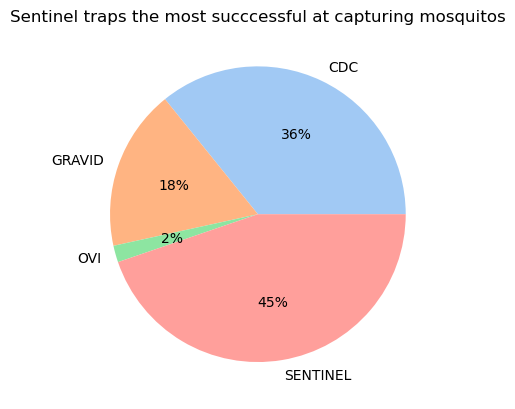

In [69]:
#define data
data = trap_success_ratio
labels = df_trap_sum.index

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:4]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Sentinel traps the most succcessful at capturing mosquitos')
plt.show()

The above pie chart compares the number of mosquitos captured by each trap as a proportion of the number of traps used. This gives a better way to compare traps. Sentinel traps appear to be the most successful at trapping mosquitos. Care needs to be taken when looking at this chart, as the Ovi trap is misleadingly low (only 2% of the chart). However, Only 1 Ovi trap was used and so it is not a fair representation of the success of mosquito captured.

### Exploring geospatial data

In [70]:
df_heat_map = df_clean.groupby(['Address Block']).mean()[['Lat','Lon']] 
#Identical cells for 'Address Block' can have slightly varying latitude and longitude. 
# As such, for the purpose of plotting a map, the average of these latitude and longitude have been used.
# This allows one to plot the single (approximate) location on a map. 

In [71]:
df_heat_map

,Lat,Lon
Address Block,,
101XX S STONY ISLAND AVE,41.710594,-87.584552
104XX S OGLESBY AVE,41.706024,-87.565835
104XX S VINCENNES AVE,41.704339,-87.657084
105XX S CALIFORNIA AVE,41.701010,-87.691502
109XX S COTTAGE GROVE AVE,41.695494,-87.609081
...,...,...
93XX S DR MARTIN LUTHER KING JR DR,41.724034,-87.614344
96XX S HOYNE AVE,41.718171,-87.674859
96XX S LONGWOOD DR,41.718596,-87.668926


In [72]:
df_heat_map['Mosquito Count']= df_clean.groupby(['Address Block']).sum()['Mosquito number'] # Add a new column with the total number of mosquitos found at each location. 

In [73]:
df_heat_map = df_heat_map.sort_values('Mosquito Count',ascending=False).head(5) #Only the top 5 mosquito counts are to be plotted on the map. 
df_heat_map

,Lat,Lon,Mosquito Count
Address Block,,,
41XX N OAK PARK AVE,41.956295,-87.797514,9304
101XX S STONY ISLAND AVE,41.710594,-87.584552,8117
70XX N MOSELLE AVE,42.007999,-87.778234,6618
52XX S KOLMAR AVE,41.798206,-87.736924,4974
127XX S DOTY AVE,41.662387,-87.590179,4822


In [74]:
import folium # folium a great package to use for map plotting in python.
from folium import plugins
from folium.plugins import HeatMap

map_heat = folium.Map(width=1000,height = 800, location=[41.8781, -87.6298], zoom_start=11)

df_heat_map['Lat'] = df_heat_map['Lat'].astype(float)
df_heat_map['Lon'] = df_heat_map['Lon'].astype(float)

heat_data = [[row['Lat'],row['Lon'],row['Mosquito Count']] for index, row in df_heat_map.iterrows()]

HeatMap(heat_data).add_to(map_heat)

map_heat

Plotting a heat map of the top 5 highest mosquito counts, it is easier to spot any patterns geographically. 

All of the top 5 locations (bar one) are found near bodies of water (2 surround Lake Callumet; 1 is next to a Clayton F.Smith Preserves which has a river running through it ; and 1 is in close proximity to Ridgemoor Country Club which has a number of large lakes on the golf course). 

Mosquitos are known to lay eggs in water, especially still water, and so this is likely the explanation as to why the traps in these locations trap the most.

The interesting location of note is the trap found by Chicago Midway International Airport. The following link is to a research paper which mentions Airport Malaria - mosquitos trapped on planes tend to cause a high concentration of mosquitos around airports. (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8540862/). The below is a screenshot of the Abstract from that research.

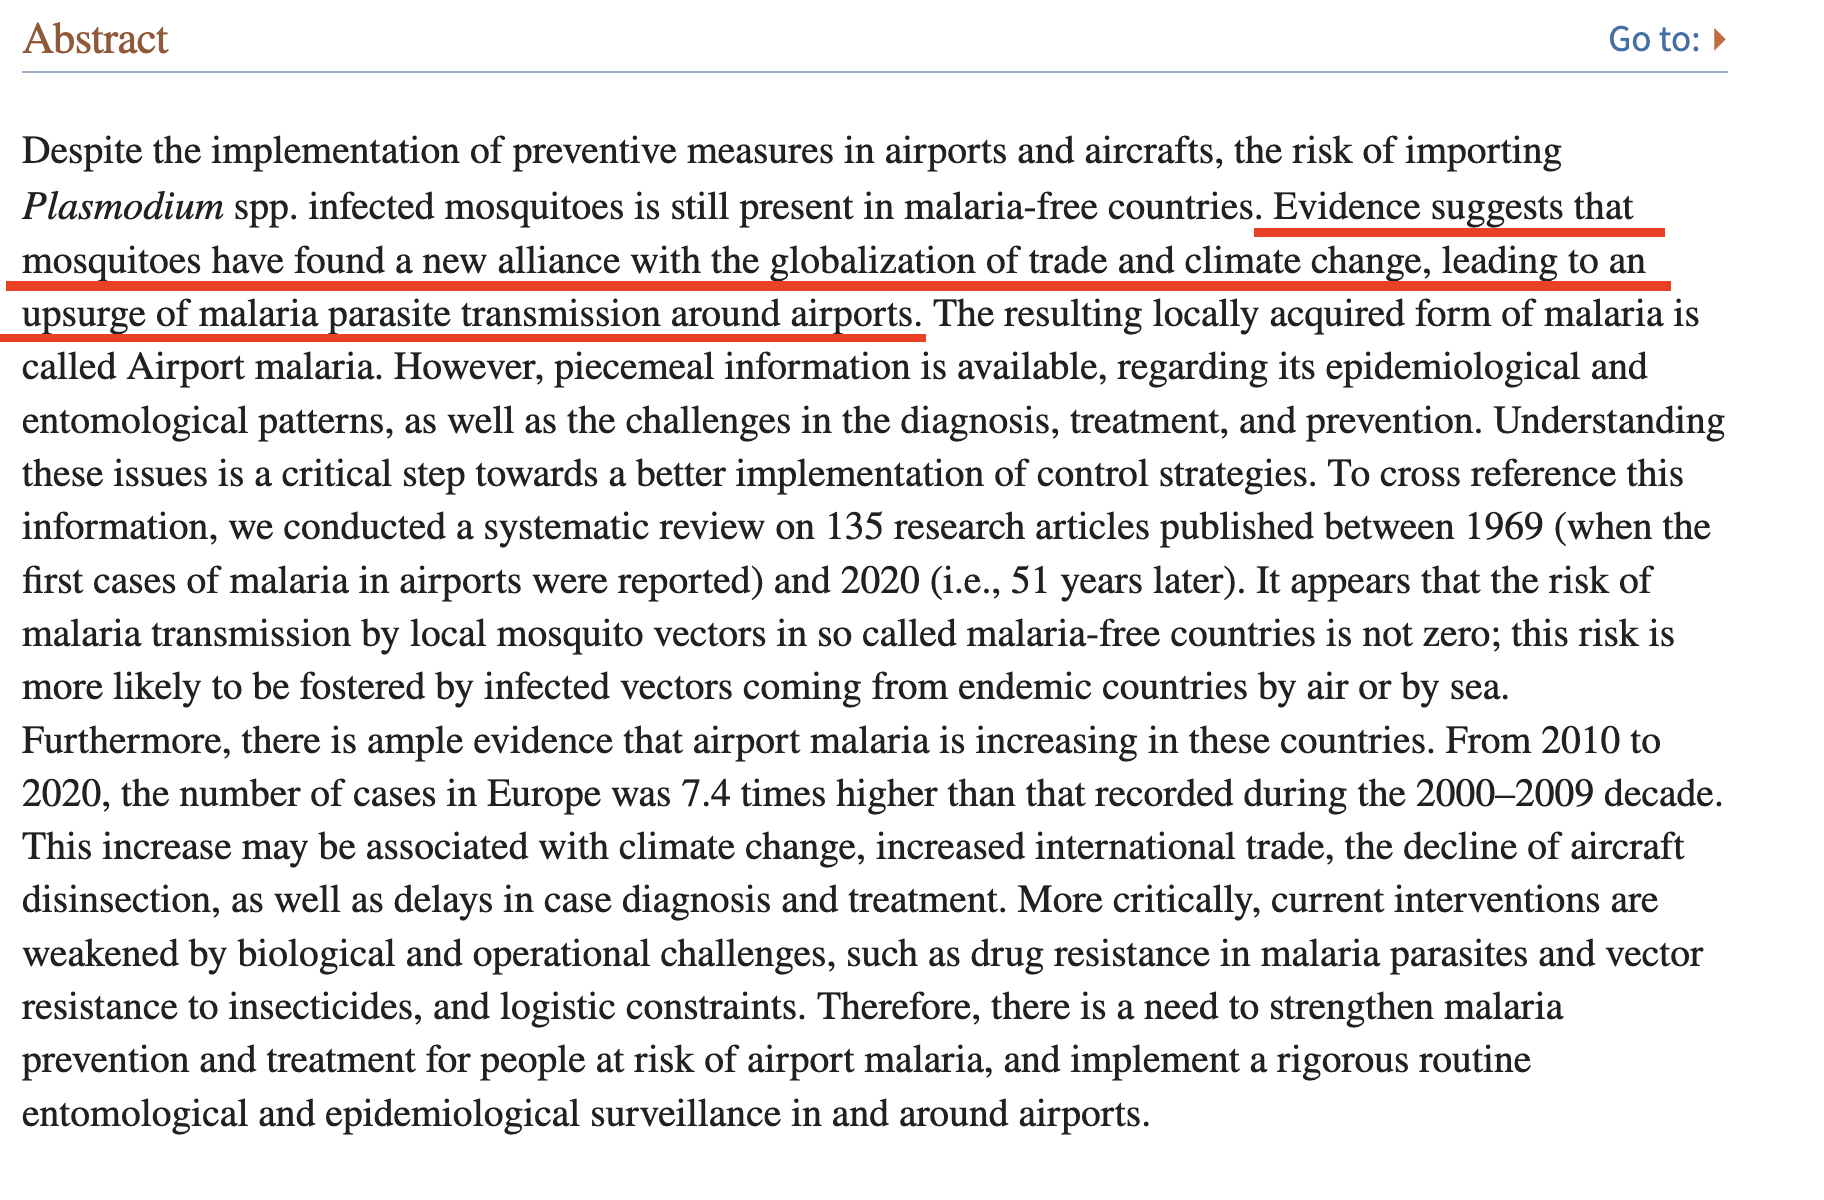

It may be interesting to see if there is a noticeable geographical pattern of positive WNV cases. By giving all 'positive' cases a 1 and 'negative' cases a 0, the total number of positive cases for each location can be counted and plotted on a heat map.

In [75]:
df_clean['Binary Positive'] = df_clean['WNV Present'].map({'positive': 1, 'negative': 0}) # Give all positive cases a 1 and negative cases a 0.


In [76]:
df_clean

,Address Block,Date,Lat,Lon,Mosquito ID,Mosquito number,Species,Trap,Trap type,WNV Present,Binary Positive
0,101XX S STONY ISLAND AVE,2019-09-26 00:09:00,41.710542,-87.584559,Res,6,CULEX RESTUANS,T138,GRAVID,negative,0
1,101XX S STONY ISLAND AVE,2019-09-19 00:09:00,41.710542,-87.584559,Res,1,CULEX RESTUANS,T138,GRAVID,negative,0
2,101XX S STONY ISLAND AVE,2019-09-12 00:09:00,41.710542,-87.584559,Res,5,CULEX RESTUANS,T138,GRAVID,negative,0
3,101XX S STONY ISLAND AVE,2019-09-05 00:09:00,41.710542,-87.584559,Ter,1,CULEX TERRITANS,T138,GRAVID,negative,0
4,101XX S STONY ISLAND AVE,2019-09-05 00:09:00,41.710542,-87.584559,Res,9,CULEX RESTUANS,T138,GRAVID,negative,0
...,...,...,...,...,...,...,...,...,...,...,...
16153,9XX W GARFIELD BLVD,2013-07-19 00:07:00,41.794368,-87.648925,Res,33,CULEX RESTUANS,T226,GRAVID,positive,1
16154,9XX W GARFIELD BLVD,2013-07-19 00:07:00,41.794369,-87.648924,Res,33,CULEX RESTUANS,T226,GRAVID,positive,1
16155,9XX W GARFIELD BLVD,2013-08-08 00:08:00,41.794371,-87.648922,Pip,5,CULEX PIPIENS,T226,GRAVID,positive,1
16156,9XX W GARFIELD BLVD,2015-08-12 00:08:00,41.794374,-87.648917,Res,22,CULEX RESTUANS,T226,GRAVID,positive,1


In [77]:
df_wnv_map = df_clean.groupby(['Address Block']).mean()[['Lat','Lon']] # Take the average longitude/latitude for each location.
df_wnv_map['WNV Positive Count'] = df_clean.groupby(['Address Block']).sum()['Binary Positive'] #sum the number of positive cases for each location
df_wnv_map['Total Mosquitos Count'] = df_clean.groupby(['Address Block']).sum()['Mosquito number'] #sum the total number of mosquitos found at each location
df_wnv_map['WNV Positive %'] = df_wnv_map['WNV Positive Count']/df_wnv_map['Total Mosquitos Count']*100 #calculate the % of mosquitos at each location that are WNV positive.


In [78]:
df_wnv_map

,Lat,Lon,WNV Positive Count,Total Mosquitos Count,WNV Positive %
Address Block,,,,,
101XX S STONY ISLAND AVE,41.710594,-87.584552,112,8117,1.379820
104XX S OGLESBY AVE,41.706024,-87.565835,0,2,0.000000
104XX S VINCENNES AVE,41.704339,-87.657084,18,653,2.756508
105XX S CALIFORNIA AVE,41.701010,-87.691502,0,79,0.000000
109XX S COTTAGE GROVE AVE,41.695494,-87.609081,20,1567,1.276324
...,...,...,...,...,...
93XX S DR MARTIN LUTHER KING JR DR,41.724034,-87.614344,3,43,6.976744
96XX S HOYNE AVE,41.718171,-87.674859,0,45,0.000000
96XX S LONGWOOD DR,41.718596,-87.668926,0,26,0.000000


In [79]:
map_heat_wnv = folium.Map(width=1000,height = 800, location=[41.8781, -87.6298], zoom_start=11)

df_wnv_map['Lat'] = df_wnv_map['Lat'].astype(float)
df_wnv_map['Lon'] = df_wnv_map['Lon'].astype(float)

heat_data_wnv = [[row['Lat'],row['Lon'],row['WNV Positive %']] for index, row in df_wnv_map.iterrows()]

HeatMap(heat_data_wnv).add_to(map_heat_wnv)

map_heat_wnv

The map above is a heat map for the % of mosquitos found to be 
WNV positive. There seems to be no discernible pattern to the geographic locations of the higher % of positive WNV cases. 

### CONCLUSION

- There are more mosquitos in summer and less in winter (seasonal).
- Culex Restuans the most common Species to be trapped.
- Of the mosquitos trapped, Culex Pipiens is most likely to carry WNV.
- The Sentinel Trap has the highest success rate at trapping mosquitos.
- The top 5 locations with the most mosquitoes trapped are all found by large bodies of water (bar one). The exception is the trap by Chicago Midway International Airport, where studies have shown mosquito concentrations to be high. It would be interesting to spend more time understanding the duplicates in the Ohare Airport entries, to see if the entry points are legitimate or not. The data could then be re-analysed to see if Ohare Airport also showed high mosquito numbers. 
